# BJUT Experiment Data Analysis

This notebook describes the analysis of the data from the STRIDE experiment performed at Beijing University of Technology on the 1st of June 2022.

The experiment data is here: https://docs.google.com/spreadsheets/d/1_skO3A7fYCdeoZaCRuFm9eblLh8PKqfm/

**IMPORTANT**

Google colab does not allow to mount files from shared directories. Thus, to bypass this limitation you have to do the following before running this notebook:
1. Go to the [STRIDE-Visualization](https://drive.google.com/drive/folders/1nB3yxO49uFyuXSkGU34rJXIv3gemznt6) folder
2. Right click on the folder and click "Add a shortcut to Drive"
3. Allow this notebook to access your drive (a pop-up will appear for doing this)

In case you get any error, click on Runtime > Disconnect and delete runtime, and try to run the notebook again.

## Initialization

Mounting Google Drive and import the experiment raw data.



In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd "drive/My Drive/STRIDE-Visualization/CN - Experiment/Experiment - Actually conducted"

/content/drive/My Drive/STRIDE-Visualization/CN - Experiment/Experiment - Actually conducted


Import the excel file into a pandas dataframe.

In [3]:
import pandas as pd

df = pd.read_excel("data4colab.xlsx")

print(df.head())

        组别      2、学号  所用时间（秒）  8  9  10  11  12  14  15  ...  19、参考信息中的：威胁类别  \
0  Group A  19074516     1189  1  2   1   1   2   2   2  ...               3   
1  Group A  19041220      535  1  1   1   1   2   2   2  ...               5   
2  Group A  19074406      566  1  1   1   1   2   2   2  ...               2   
3  Group A  19074305      774  1  1   2   1   2   2   2  ...               5   
4  Group A  19074502      977  1  1   2   1   2   2   2  ...               2   

   19. Reference information: the object of the threat  \
0                                                  3     
1                                                  5     
2                                                  2     
3                                                  5     
4                                                  2     

   20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur  \
0                                              

Exit questionnaire

In [4]:
df['20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur'].value_counts()

,count
20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur,
3,26
2,20
4,3
1,1


In [5]:
df['21. Your knowledge of threat analysis is enough for you to understand threat descriptions'].value_counts()

,count
21. Your knowledge of threat analysis is enough for you to understand threat descriptions,
2,20
3,16
4,11
1,2
5,1


In [6]:
df['22. Please evaluate the difficulty of judging whether the threat is likely to occur'].value_counts()

,count
22. Please evaluate the difficulty of judging whether the threat is likely to occur,
4,27
3,16
2,5
5,2


In [7]:
df['23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?'].value_counts()

,count
"23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?",
3,24
2,13
4,9
1,4


In [8]:
df['24. You have enough time to read the materials and complete the tasks'].value_counts()

,count
24. You have enough time to read the materials and complete the tasks,
4,24
3,13
2,9
1,2
5,2


In [9]:
df['25. The information provided in the questionnaire (reading materials, threat lists) is enough for you to judge whether the threat is likely to occur'].value_counts()

,count
"25. The information provided in the questionnaire (reading materials, threat lists) is enough for you to judge whether the threat is likely to occur",
3,27
2,12
4,10
5,1


Select only relevant columns (by index). The selected columns are Duration, Group, and list of Threats.


In [10]:
# Select relevant columns
df1 = df.iloc[:, [0, 1, 2]].join(df.iloc[:, 3:13])

# Rename columns
df1.columns.values[0] = "Group"
df1.columns.values[1] = "Student_ID"
df1.columns.values[2] = "Duration"

# Convert the Student_ID column to int
# df1 = df1.fillna(0)
# df1["Student_ID"].astype(int)

Select Group A.

In [11]:
# Group A
df_A = df1[(df1["Group"] == "Group A")]
df_A = df_A.iloc[:, 0:14].copy()

# Rename columns
df_A.columns.values[3] = "Threat_1"
df_A.columns.values[4] = "Threat_2"
df_A.columns.values[5] = "Threat_3"
df_A.columns.values[6] = "Threat_4"
df_A.columns.values[7] = "Threat_5"
df_A.columns.values[8] = "Threat_6"
df_A.columns.values[9] = "Threat_7"
df_A.columns.values[10] = "Threat_8"
df_A.columns.values[11] = "Threat_9"
df_A.columns.values[12] = "Threat_10"

df_A.head()

,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
0,Group A,19074516,1189,1,2,1,1,2,2,2,1,2,1
1,Group A,19041220,535,1,1,1,1,2,2,2,1,2,1
2,Group A,19074406,566,1,1,1,1,2,2,2,1,2,1
3,Group A,19074305,774,1,1,2,1,2,2,2,1,2,1
4,Group A,19074502,977,1,1,2,1,2,2,2,1,2,1


Select Group B.

In [12]:
# Group B
df_B = df1[(df1["Group"] == "Group B")]
df_B = df_B.iloc[:, 0:13].copy()

# Rename columns
df_B.columns.values[3] = "Threat_1"
df_B.columns.values[4] = "Threat_2"
df_B.columns.values[5] = "Threat_3"
df_B.columns.values[6] = "Threat_4"
df_B.columns.values[7] = "Threat_5"
df_B.columns.values[8] = "Threat_6"
df_B.columns.values[9] = "Threat_7"
df_B.columns.values[10] = "Threat_8"
df_B.columns.values[11] = "Threat_9"
df_B.columns.values[12] = "Threat_10"

df_B.head()

,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
25,Group B,19074519,942,1,1,1,1,2,2,2,1,2,1
26,Group B,DT200701,1085,1,1,1,1,2,2,2,1,2,1
27,Group B,19074216,1626,1,1,1,1,2,2,2,1,2,1
28,Group B,19074213,1673,1,2,2,1,2,2,2,1,2,1
29,Group B,19074208,425,1,2,1,1,1,2,1,1,2,1


## Analyzing Group A performance


Number of students belonging to Group A.

In [13]:
df_A.shape[0]

25

Average time (in minutes) to complete the experiments for (Group A) students.

In [14]:
df_A["Duration"].mean() / 60

16.579333333333334

Slowest student:

In [15]:
df_A["Duration"].max() / 60

28.066666666666666

Fastest student:

In [16]:
df_A["Duration"].min() / 60

6.2

Optional filter to remove students that took less than 20 minutes. **17 students** took less than 20 minutes.

In [17]:
df_aux = df_A[df_A["Duration"] >= 1200]
# df_A = df_aux
df_A.shape[0] - df_aux.shape[0]

#df_A.shape[0]

17

Precision and Recall for Group A

In [18]:
# for index, row in df_A.iterrows():
#   print(row[3:14])

# real threat: 1, fake threat: 2
threat_type = [1, 2, 1, 1, 2, 2, 2, 1, 2, 1]

precision_list_A = []
recall_list_A = []

TP_list_A = []
FP_list_A = []
FN_list_A = []
TN_list_A = []

for index, row in df_A.iterrows():
  TP = 0 # True Positive - Real threats being selected
  FN = 0 # False Negatives - Real threats not being selected
  FP = 0 # False Positive - Fake threats being selected
  TN = 0 # True Negative - Fake threats not being selected
  for answer, result in zip(threat_type, row[3:14]):
    if answer == 1:
      if result == 1:
        TP += 1
      else:
        FN += 1
    else:
      if result == 2:
        TN += 1
      else:
        FP += 1

  TP_list_A.append(TP)
  FN_list_A.append(FN)
  TN_list_A.append(TN)
  FP_list_A.append(FP)
  precision_list_A.append(TP / (TP + FP))
  recall_list_A.append(TP / (TP + FN))

# precision_list_A = [ round(elem, 2) for elem in precision_list_A ]
# recall_list_A = [ round(elem, 2) for elem in recall_list_A ]
TP_list_A = [ round(elem, 2) for elem in TP_list_A ]
FP_list_A = [ round(elem, 2) for elem in FP_list_A ]
FN_list_A = [ round(elem, 2) for elem in FN_list_A ]
TN_list_A = [ round(elem, 2) for elem in TN_list_A ]
# TP_TN_list_A    should be     TP + TN
TP_TN_list_A = [i + j for i, j in zip(TP_list_A, TN_list_A)]


TP_avg_A = sum(TP_list_A) / len(TP_list_A)
FP_avg_A = sum(FP_list_A) / len(FP_list_A)
FN_avg_A = sum(FN_list_A) / len(FN_list_A)
TN_avg_A = sum(TN_list_A) / len(TN_list_A)
TP_TN_Avg_A = sum(TP_TN_list_A) / len(TP_TN_list_A) # Actually, TP_TN_Avg = TP_avg + TN_avg

print(TP_list_A)
print(TN_list_A)
print(TP_TN_list_A)
print(TP_avg_A)
print(FN_avg_A)
print(TN_avg_A)
print(FP_avg_A)
print(TP_TN_Avg_A)


[5, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 3, 4, 5, 4, 3, 5, 5, 5, 4, 4]
[5, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 0, 0, 0, 1, 1]
[10, 9, 9, 8, 8, 8, 7, 7, 7, 7, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5]
4.4
0.6
2.44
2.56
6.84


In [19]:
print(precision_list_A)
print(recall_list_A)

print(sum(precision_list_A)/len(precision_list_A))
print(sum(recall_list_A)/len(recall_list_A))



[1.0, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.7142857142857143, 0.625, 0.6666666666666666, 0.6666666666666666, 0.75, 0.7142857142857143, 0.7142857142857143, 0.625, 0.6666666666666666, 0.5555555555555556, 0.6, 0.5714285714285714, 0.5555555555555556, 0.5714285714285714, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5]
[1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 1.0, 0.8, 0.8, 0.6, 1.0, 1.0, 1.0, 0.8, 1.0, 0.6, 0.8, 1.0, 0.8, 0.6, 1.0, 1.0, 1.0, 0.8, 0.8]
0.6545396825396824
0.8800000000000001


Bar Plot for group A

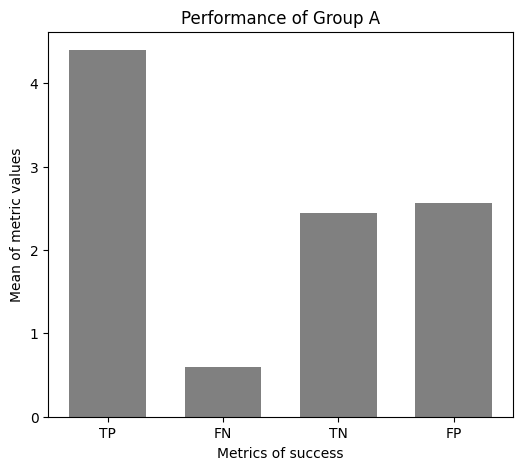

In [20]:
import matplotlib.pyplot as plt

metrics = ["TP", "FN", "TN", "FP"]
means = [TP_avg_A, FN_avg_A, TN_avg_A, FP_avg_A]

fig = plt.figure(figsize = (6, 5))

#  Bar plot style
plt.bar(metrics, means, color ='grey',
        width = 0.666)
plt.xlabel("Metrics of success")
plt.ylabel("Mean of metric values")
plt.title("Performance of Group A")
plt.show()

The threat most guessed were **Threat 1** and **Threat 10**, by **24** students.


The threats less guessed were **Threat 3**, by **16** students.

In [21]:
# Select the 5 real threats
df_A_real = df_A.iloc[:, [3, 5, 6, 10, 12]]
# print(df_real)
# Count the students that guessed each threat
print(df_A_real[df_A_real == 1].count()) # correct, real for real
print(df_A_real[df_A_real == 2].count()) # wrong, fake for real

Threat_1     24
Threat_3     16
Threat_4     23
Threat_8     23
Threat_10    24
dtype: int64
Threat_1     1
Threat_3     9
Threat_4     2
Threat_8     2
Threat_10    1
dtype: int64


Bar Chart representing the number of correct and wrong answers for each **real threat** for Group A.

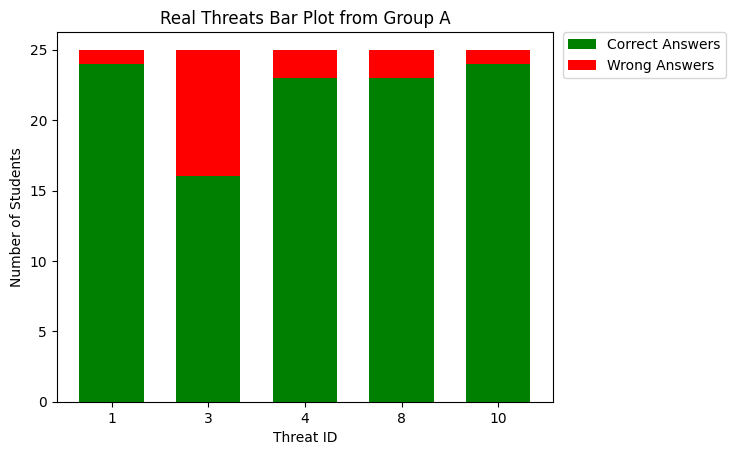

In [22]:
# https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=bZv4MenQpYOF

import matplotlib.pyplot as plt

x1 = ["1", "3", "4", "8", "10"]
y1 = [24, 16, 23, 23, 24]

x2 = ["1", "3", "4", "8", "10"]
y2 = [1, 9, 2, 2, 1]

plt.bar(x1, y1, label="Correct Answers", color='g', width = 0.666)
plt.bar(x2, y2, bottom=y1, label="Wrong Answers", color='r', width = 0.666)
plt.plot()

plt.xlabel("Threat ID")
plt.ylabel("Number of Students")
plt.title("Real Threats Bar Plot from Group A")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**13 students** guessed all 5 real threats, out of 25.

In [23]:
# the students guessed all six real threats
df_A_real_all_correct = df_A_real[df_A_real != 2].dropna()
print(df_A_real_all_correct.shape[0])
print(df_A_real_all_correct.index) # showing the student index

13
Index([0, 1, 2, 5, 6, 10, 11, 12, 14, 17, 20, 21, 22], dtype='int64')


In [24]:
# Select the rows of the 13 students
df_A[df_A != 2].iloc[df_A_real_all_correct.index, :]

,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
0,Group A,19074516,1189,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
1,Group A,19041220,535,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
2,Group A,19074406,566,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
5,Group A,19074518,1292,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
6,Group A,19074211,372,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
10,Group A,19090326,1180,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
11,Group A,DT200702,1684,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
12,Group A,19053207,1614,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
14,Group A,19074511,427,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
17,Group A,19074313,1438,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0


Repeat the same process for the fake threats.

In [25]:
# Select the 5 fake threats
df_A_fake  = df_A.iloc[:, [4, 7, 8, 9, 11]]

# Count the students that guessed each threat
print(df_A_fake[df_A_fake == 2].count()) # correct, fake for fake
print(df_A_fake[df_A_fake == 1].count()) # wrong, real for fake

Threat_2     5
Threat_5    16
Threat_6    17
Threat_7    14
Threat_9     9
dtype: int64
Threat_2    20
Threat_5     9
Threat_6     8
Threat_7    11
Threat_9    16
dtype: int64


Bar Chart representing the number of correct and wrong answers for each **fake threat** for Group A.

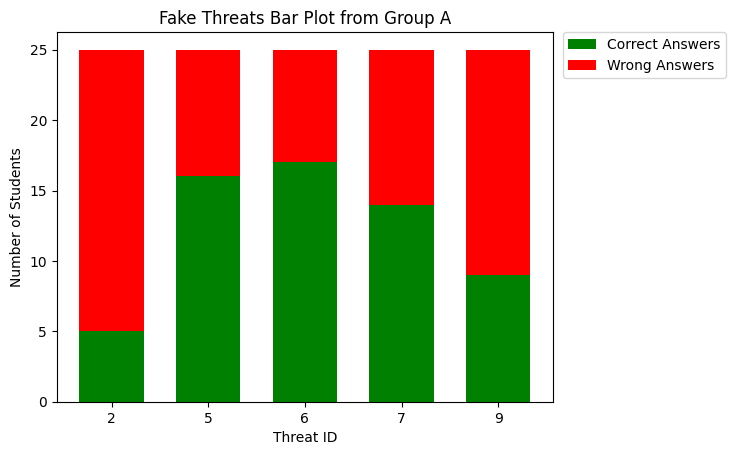

In [26]:
import matplotlib.pyplot as plt

x1 = ["2", "5", "6", "7", "9"]
y1 = [5, 16, 17, 14, 9]

x2 = ["2", "5", "6", "7", "9"]
y2 = [20, 9, 8, 11, 16]

plt.bar(x1, y1, label="Correct Answers", color='g', width = 0.666)
plt.bar(x2, y2, bottom=y1, label="Wrong Answers", color='r', width = 0.666)
plt.plot()

plt.xlabel("Threat ID")
plt.ylabel("Number of Students")
plt.title("Fake Threats Bar Plot from Group A")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Only **one student** guessed all 5 fake threats, with finding all 5 real threats.

In [27]:
# the students guessed all five fake threats
df_A_fake_all_correct = df_A_fake[df_A_fake != 1].dropna()
print(df_A_fake_all_correct.shape[0])
print(df_A_fake_all_correct.index) # showing the student index
df_A[df_A != 2].iloc[df_A_fake_all_correct.index, :]

1
Index([0], dtype='int64')


,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
0,Group A,19074516,1189,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0


## Analyze Group B performance

Number of students belonging to Group B.

In [28]:
df_B.shape[0]

25

Average time (in minutes) to complete the experiments for (Group B) students. The average time in Group A is 16.58min

In [29]:
df_B["Duration"].mean() / 60

19.541999999999998

Slowest student:

In [30]:
df_B["Duration"].max() / 60

28.416666666666668

Fastest student:

In [31]:
df_B["Duration"].min() / 60

6.683333333333334

Optional filter to remove students that took less than 20 minutes. **13 students** took less than 20 minutes. (17 less than 20min in Group A)

In [32]:
df_aux = df_B[df_B["Duration"] > 1200]
df_B.shape[0]-df_aux.shape[0]

# df_B.shape[0]

13

Precision and Recall of Group B

In [33]:
# real threat: 1, fake threat: 2
threat_type = [1, 2, 1, 1, 2, 2, 2, 1, 2, 1]

precision_list_B = []
recall_list_B = []

TP_list_B = []
FP_list_B = []
FN_list_B = []
TN_list_B = []

for index, row in df_B.iterrows():
  TP = 0 # True Positive - Real threats being selected
  FN = 0 # False Negatives - Real threats not being selected
  FP = 0 # False Positive - Fake threats being selected
  TN = 0 # True Negative - Fake threats not being selected
  for answer, result in zip(threat_type, row[3:14]):
    if answer == 1:
      if result == 1:
        TP += 1
      else:
        FN += 1
    else:
      if result == 2:
        TN += 1
      else:
        FP += 1

  TP_list_B.append(TP)
  FN_list_B.append(FN)
  TN_list_B.append(TN)
  FP_list_B.append(FP)
  precision_list_B.append(TP / (TP + FP))
  recall_list_B.append(TP / (TP + FN))

# precision_list_B = [ round(elem, 2) for elem in precision_list_B ]
# recall_list_B = [ round(elem, 2) for elem in recall_list_B ]
TP_list_B = [ round(elem, 2) for elem in TP_list_B ]
FP_list_B = [ round(elem, 2) for elem in FP_list_B ]
FN_list_B = [ round(elem, 2) for elem in FN_list_B ]
TN_list_B = [ round(elem, 2) for elem in TN_list_B ]
# TP_TN_list_A    should be     TP + TN
TP_TN_list_B = [i + j for i, j in zip(TP_list_B, TN_list_B)]


TP_avg_B = sum(TP_list_B) / len(TP_list_B)
FP_avg_B = sum(FP_list_B) / len(FP_list_B)
FN_avg_B = sum(FN_list_B) / len(FN_list_B)
TN_avg_B = sum(TN_list_B) / len(TN_list_B)
# Should we multiply the result by 2?
# what the TP_TN_Avg_B stands for?
TP_TN_Avg_B = sum(TP_TN_list_B) / len(TP_TN_list_B) # Actually, TP_TN_Avg = TP_avg + TN_avg

print(TP_list_B)
print(TN_list_B)
print(TP_TN_list_B)
print(TP_avg_B)
print(FN_avg_B)
print(TN_avg_B)
print(FP_avg_B)
print(TP_TN_Avg_B)

[5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 3, 5, 5, 3, 4, 5, 5, 5, 5, 4, 2, 3, 3]
[4, 4, 4, 5, 3, 3, 3, 3, 4, 4, 3, 4, 4, 2, 2, 4, 3, 2, 1, 1, 0, 1, 2, 1, 0]
[9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 4, 4, 3]
4.28
0.72
2.68
2.32
6.96


In [34]:
print(precision_list_B)
print(recall_list_B)

print(sum(precision_list_B)/len(precision_list_B))
print(sum(recall_list_B)/len(recall_list_B))

[0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 1.0, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8, 0.8, 0.7142857142857143, 0.75, 0.75, 0.625, 0.625, 0.75, 0.6666666666666666, 0.625, 0.5555555555555556, 0.5555555555555556, 0.5, 0.5, 0.4, 0.42857142857142855, 0.375]
[1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.6, 0.6, 1.0, 1.0, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.6, 0.6]
0.671111111111111
0.8560000000000001


Bar plot for Group B

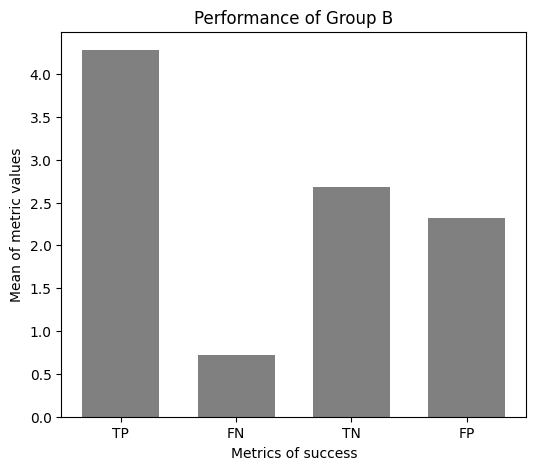

In [35]:
import matplotlib.pyplot as plt

metrics = ["TP", "FN", "TN", "FP"]
means = [TP_avg_B, FN_avg_B, TN_avg_B, FP_avg_B]

fig = plt.figure(figsize = (6, 5))

#  Bar plot style
plt.bar(metrics, means, color ='grey', width = 0.666)
plt.xlabel("Metrics of success")
plt.ylabel("Mean of metric values")
plt.title("Performance of Group B")
plt.show()

The threat most guessed was **Threat 10**, by **24** students out of 25. (Threat 1 and 10 in Group A, 24/25)

The threat less guessed was **Threat 3**, by **18** students out of 25. (Threat 3 in Group A, 16/25)

In [36]:
# Select the 5 real threats
df_B_real = df_B.iloc[:, [3, 5, 6, 10, 12]]

# print(df_real)
# Count the students that guessed each threat
print(df_B_real[df_B_real == 1].count()) # correct, real for real
print(df_B_real[df_B_real == 2].count()) # wrong, fake for real

Threat_1     21
Threat_3     18
Threat_4     22
Threat_8     22
Threat_10    24
dtype: int64
Threat_1     4
Threat_3     7
Threat_4     3
Threat_8     3
Threat_10    1
dtype: int64


Bar Chart representing the number of correct and wrong answers for each **real threat** for Group B.

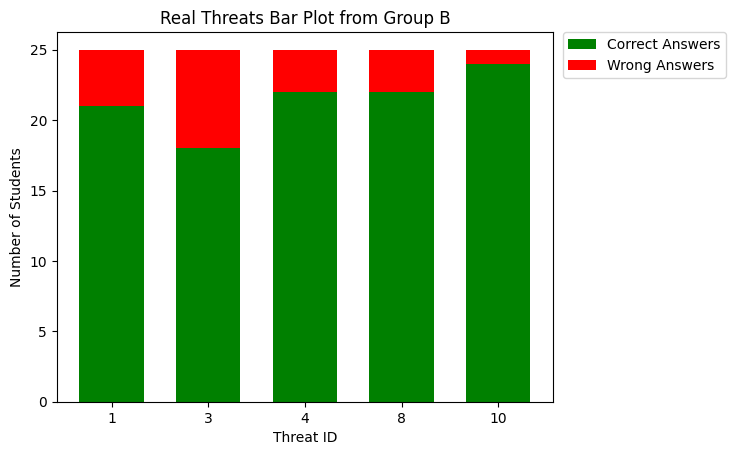

In [37]:
import matplotlib.pyplot as plt

x1 = ["1", "3", "4", "8", "10"]
y1 = [21, 18, 22, 22, 24]

x2 = ["1", "3", "4", "8", "10"]
y2 = [4, 7, 3, 3, 1]

plt.bar(x1, y1, label="Correct Answers", color='g', width = 0.666)
plt.bar(x2, y2, bottom=y1, label="Wrong Answers", color='r', width = 0.666)
plt.plot()

plt.xlabel("Threat ID")
plt.ylabel("Number of Students")
plt.title("Real Threats Bar Plot from Group B")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**14 student** guessed all six real threats, out of 25 students. (13 in Group A)

In [38]:
# the students guessed all six real threats
df_B_real_all_correct = df_B_real[df_B_real != 2].dropna()
print(df_B_real_all_correct.shape[0])
print(df_B_real_all_correct.index) # showing the student index

14
Index([25, 26, 27, 29, 30, 31, 32, 35, 38, 39, 42, 43, 44, 45], dtype='int64')


Performance of the 14 students:

In [39]:
df_B[df_B != 2].iloc[df_B_real_all_correct.index-df_A.shape[0], :]

,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
25,Group B,19074519,942,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
26,Group B,DT200701,1085,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
27,Group B,19074216,1626,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
29,Group B,19074208,425,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0
30,Group B,19074315,483,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0
31,Group B,18074705,1305,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
32,Group B,19074505,1480,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
35,Group B,19074201,1705,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0
38,Group B,19074212,1129,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
39,Group B,19074407,1190,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0


Repeat the same process for the fake threats.

In [40]:
# Select the 5 fake threats
df_B_fake  = df_B.iloc[:, [4, 7, 8, 9, 11]]

# Count the students that guessed each threat
print(df_B_fake[df_B_fake == 2].count()) # correct, fake for fake
print(df_B_fake[df_B_fake == 1].count()) # wrong, real for fake


Threat_2     4
Threat_5    16
Threat_6    19
Threat_7    15
Threat_9    13
dtype: int64
Threat_2    21
Threat_5     9
Threat_6     6
Threat_7    10
Threat_9    12
dtype: int64


Bar Chart representing the number of correct and wrong answers for each **fake threat** for Group B.

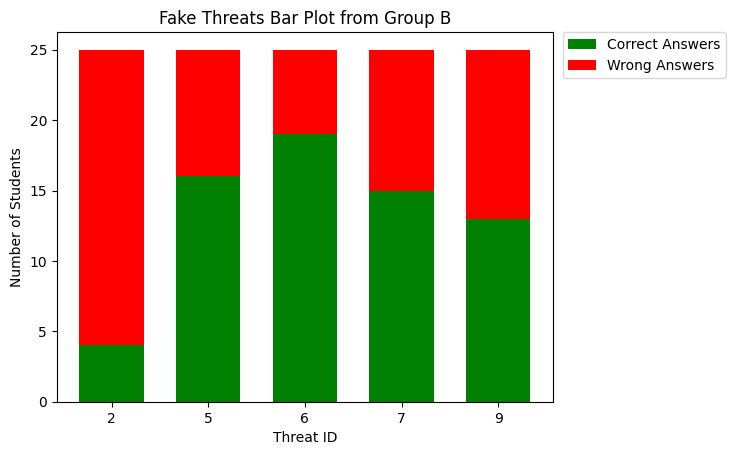

In [41]:
import matplotlib.pyplot as plt

x1 = ["2", "5", "6", "7", "9"]
y1 = [4, 16, 19, 15, 13]

x2 = ["2", "5", "6", "7", "9"]
y2 = [21, 9, 6, 10, 12]

plt.bar(x1, y1, label="Correct Answers", color='g', width = 0.666)
plt.bar(x2, y2, bottom=y1, label="Wrong Answers", color='r', width = 0.666)
plt.plot()

plt.xlabel("Threat ID")
plt.ylabel("Number of Students")
plt.title("Fake Threats Bar Plot from Group B")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


Only **one student** guessed all 5 fake threats, with finding 4 real threats out of 5. (Group A: only one too)

In [42]:
# the students guessed all five fake threats
df_B_fake_all_correct = df_B_fake[df_B_fake != 1].dropna()
print(df_B_fake_all_correct.shape[0])
print(df_B_fake_all_correct.index) # showing the student index

df_B[df_B != 2].iloc[df_B_fake_all_correct.index - df_A.shape[0], :]

1
Index([28], dtype='int64')


,Group,Student_ID,Duration,Threat_1,Threat_2,Threat_3,Threat_4,Threat_5,Threat_6,Threat_7,Threat_8,Threat_9,Threat_10
28,Group B,19074213,1673,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0


## Comparison of the two groups

Box plot for Group A and Group B of Precision and Recall

[1.0, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.7142857142857143, 0.625, 0.6666666666666666, 0.6666666666666666, 0.75, 0.7142857142857143, 0.7142857142857143, 0.625, 0.6666666666666666, 0.5555555555555556, 0.6, 0.5714285714285714, 0.5555555555555556, 0.5714285714285714, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 1.0, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8, 0.8, 0.7142857142857143, 0.75, 0.75, 0.625, 0.625, 0.75, 0.6666666666666666, 0.625, 0.5555555555555556, 0.5555555555555556, 0.5, 0.5, 0.4, 0.42857142857142855, 0.375]
[1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 1.0, 0.8, 0.8, 0.6, 1.0, 1.0, 1.0, 0.8, 1.0, 0.6, 0.8, 1.0, 0.8, 0.6, 1.0, 1.0, 1.0, 0.8, 0.8]
[1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.6, 0.6, 1.0, 1.0, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.6, 0.6]


<ipython-input-43-9efd166e459f>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['P(Group A)','P(Group B)','R(Group A)','R(Group B)'])


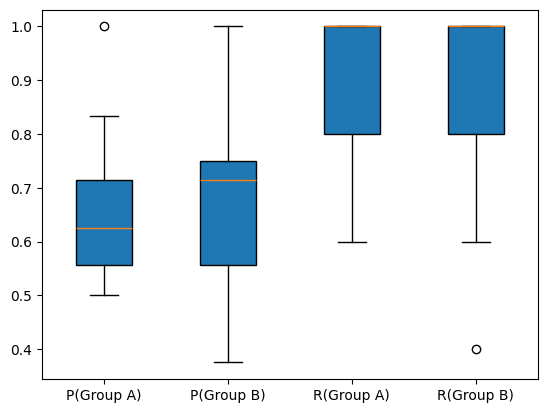

In [43]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

print(precision_list_A)
print(precision_list_B)

print(recall_list_A)
print(recall_list_B)

box_plot_data=[precision_list_A, precision_list_B, recall_list_A, recall_list_B]

plt.boxplot(box_plot_data, patch_artist=True, labels=['P(Group A)','P(Group B)','R(Group A)','R(Group B)'])
plt.show()

In [44]:
import statistics

print(statistics.pstdev(TN_list_B))

1.377534028617805


In [45]:
import numpy as np

print(np.quantile(TN_list_A, q = np.arange(0.25, 1, 0.25)))

[1. 3. 3.]


In [46]:
print("==== Group A  TP ====")
print(pd.Series(TP_list_A).describe())
print("==== Group A  TN ====")
print(pd.Series(TN_list_A).describe())
print("==== Group B  TP ====")
print(pd.Series(TP_list_B).describe())
print("==== Group B  TN ====")
print(pd.Series(TN_list_B).describe())

print("\n\n==== Group A  TP+TN ====")
print(pd.Series(TP_TN_list_A).describe())

print("==== Group B  TP+TN ====")
print(pd.Series(TP_TN_list_B).describe())

==== Group A  TP ====
count    25.000000
mean      4.400000
std       0.707107
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
dtype: float64
==== Group A  TN ====
count    25.000000
mean      2.440000
std       1.416569
min       0.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
dtype: float64
==== Group B  TP ====
count    25.000000
mean      4.280000
std       0.936305
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
dtype: float64
==== Group B  TN ====
count    25.00000
mean      2.68000
std       1.40594
min       0.00000
25%       2.00000
50%       3.00000
75%       4.00000
max       5.00000
dtype: float64


==== Group A  TP+TN ====
count    25.000000
mean      6.840000
std       1.404754
min       5.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      10.000000
dtype: float64
==== Group B  TP+TN ====
count    25.000000
mean      6.96

In [47]:
from scipy.stats import ttest_ind

# two tails, same variance T-test
print(ttest_ind(TP_TN_list_A, TP_TN_list_B))

TtestResult(statistic=-0.27491330779349243, pvalue=0.7845627233237167, df=48.0)


[5, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 3, 4, 5, 4, 3, 5, 5, 5, 4, 4]
[5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 3, 5, 5, 3, 4, 5, 5, 5, 5, 4, 2, 3, 3]
[5, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 0, 0, 0, 1, 1]
[4, 4, 4, 5, 3, 3, 3, 3, 4, 4, 3, 4, 4, 2, 2, 4, 3, 2, 1, 1, 0, 1, 2, 1, 0]


<ipython-input-48-0a4132a92b8c>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group A)','TP(Group B)','TN(Group A)','TN(Group B)'])


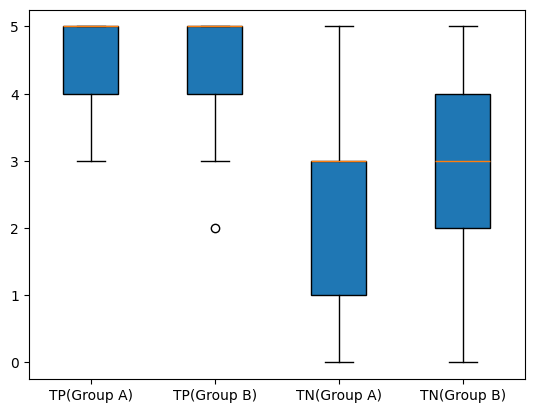

In [48]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

print(TP_list_A)
print(TP_list_B)

print(TN_list_A)
print(TN_list_B)

box_plot_data=[TP_list_A, TP_list_B, TN_list_A, TN_list_B]

plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group A)','TP(Group B)','TN(Group A)','TN(Group B)'])
plt.show()

[5, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 3, 4, 5, 4, 3, 5, 5, 5, 4, 4]
[5, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 0, 0, 0, 1, 1]


<ipython-input-49-1f3a305e8702>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group A)','TN(Group A)'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

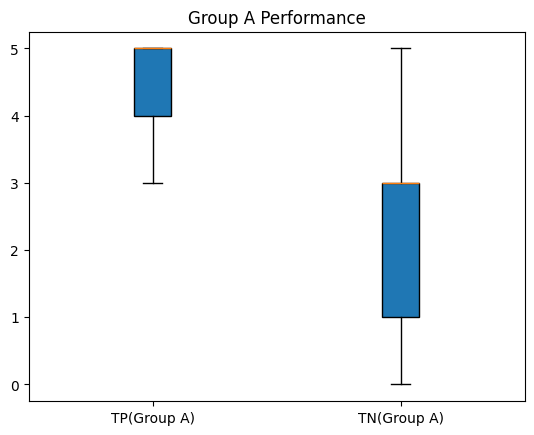

In [49]:
#performance of group A

import matplotlib.pyplot as plt
import warnings
import numpy as np
from google.colab import files

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

print(TP_list_A)
print(TN_list_A)


box_plot_data=[TP_list_A, TN_list_A]


fig = plt.figure()
plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group A)','TN(Group A)'])
plt.title('Group A Performance')

fig.savefig('CN Group A performance.jpg', bbox_inches='tight', dpi=250)
files.download('CN Group A performance.jpg')
plt.show()

[5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 3, 5, 5, 3, 4, 5, 5, 5, 5, 4, 2, 3, 3]
[4, 4, 4, 5, 3, 3, 3, 3, 4, 4, 3, 4, 4, 2, 2, 4, 3, 2, 1, 1, 0, 1, 2, 1, 0]


<ipython-input-50-4a5c0f0d895e>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group B)','TN(Group B)'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

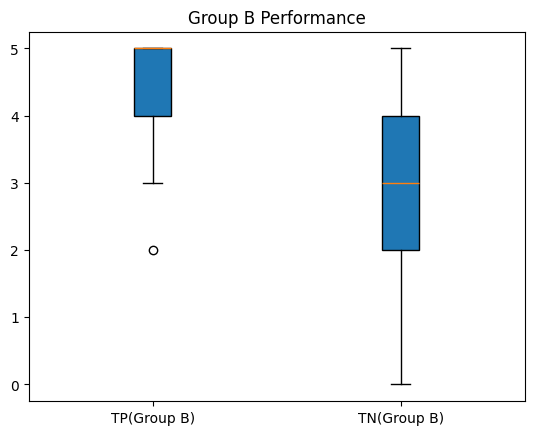

In [50]:
#performance of group B

import matplotlib.pyplot as plt
import warnings
import numpy as np
from google.colab import files

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

print(TP_list_B)
print(TN_list_B)


box_plot_data=[TP_list_B, TN_list_B]

fig = plt.figure()
plt.boxplot(box_plot_data, patch_artist=True, labels=['TP(Group B)','TN(Group B)'])
plt.title('Group B Performance')

# plt.figure(figsize=(0.5,0.5))
fig.savefig('CN Group B performance.jpg', bbox_inches='tight', dpi=250)
files.download('CN Group B performance.jpg')
plt.show()

<ipython-input-51-9fc5bed6354c>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True,


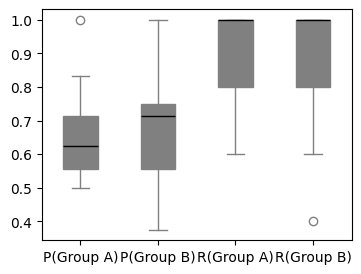

In [51]:
plt.figure(figsize=(4,3))

box_plot_data=[precision_list_A, precision_list_B, recall_list_A, recall_list_B]

c = "grey"
plt.boxplot(box_plot_data, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color="black"),
            labels=['P(Group A)','P(Group B)','R(Group A)','R(Group B)']
            )

plt.show()

In [52]:
from scipy.stats import mannwhitneyu

# Mannwhitneyu for precision
mwt_precision = mannwhitneyu(precision_list_A, precision_list_B)

# Mannwhitneyu for recall
mwt_recall = mannwhitneyu(recall_list_A, recall_list_B)

# Mannwhitneyu for TP
mwt_tp = mannwhitneyu(TP_list_A, TP_list_B)

# Mannwhitneyu for FP
mwt_fp = mannwhitneyu(FP_list_A, FP_list_B)

# Mannwhitneyu for FN
mwt_fn = mannwhitneyu(FN_list_A, FN_list_B)

# Mannwhitneyu for TN
mwt_tn = mannwhitneyu(TN_list_A, TN_list_B)

# Mannwhitneyu for TN + TP
mwt_tp_tn = mannwhitneyu(TP_TN_list_A,TP_TN_list_B)

print(mwt_precision)
print(mwt_recall)
print(mwt_tp)
print(mwt_fp)
print(mwt_fn)

print(mwt_tn)
print(mwt_tp_tn)

MannwhitneyuResult(statistic=276.0, pvalue=0.4825090599600357)
MannwhitneyuResult(statistic=321.0, pvalue=0.8636343504157202)
MannwhitneyuResult(statistic=321.0, pvalue=0.8636343504157202)
MannwhitneyuResult(statistic=345.5, pvalue=0.5180000165725753)
MannwhitneyuResult(statistic=304.0, pvalue=0.8636343504157202)
MannwhitneyuResult(statistic=279.5, pvalue=0.5180000165725753)
MannwhitneyuResult(statistic=277.5, pvalue=0.4945548847989416)


Merge the two groups dataframes.

In [53]:
df_all = df_A.merge(df_B, how='outer')

# df_all

Total number of students:

In [54]:
df_all.shape[0]

50

Group A performance on real threats:

In [55]:
df_A_real = df_A.iloc[:, [3, 5, 6, 10, 12]] # List of real threats

# tot_answer = real_t.shape[0]*6 # #_students * 5 threats

# correct_answers/all_answers
df_A_real[df_A_real == 1].count().sum() / df_A_real.count().sum()

0.88

**88%** of the given answers in identifying real threats were correct.

Group A performance on fake threats:

In [56]:
df_A_fake = df_A.iloc[:, [4, 7, 8, 9, 11]]
df_A_fake[df_A_fake == 2].count().sum() / df_A_fake.count().sum()

0.488

Group B performance on real threats:

In [57]:
df_B_real = df_B.iloc[:, [3, 5, 6, 10, 12]] # List of real threats
df_B_real[df_B_real == 1].count().sum() / df_B_real.count().sum()

0.856

Group B performance on fake threats:

In [58]:
df_B_fake = df_B.iloc[:, [4, 7, 8, 9, 11]]
df_B_fake[df_B_fake == 2].count().sum() / df_B_fake.count().sum()

0.536

## **Perception** Group A

In [59]:
# Select relevant columns
df1 = df.iloc[:, [0,1,2]].join(df.iloc[:, 13:26])
# Rename columns
df1.columns.values[0] = "Group"
df1.columns.values[1] = "Student_ID"
df1.columns.values[2] = "Duration"
df1.head()

,Group,Student_ID,Duration,19、在判断威胁是否有可能发生时，下列信息的有用性如何？—背景知识,19、时序图,19、数据流图,19、已知条件,19、威胁描述,19、参考信息中的：威胁类别,19. Reference information: the object of the threat,20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur,21. Your knowledge of threat analysis is enough for you to understand threat descriptions,22. Please evaluate the difficulty of judging whether the threat is likely to occur,"23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?",24. You have enough time to read the materials and complete the tasks,"25. The information provided in the questionnaire (reading materials, threat lists) is enough for you to judge whether the threat is likely to occur"
0,Group A,19074516,1189,5,1,1.0,4,4,3,3,2,2,2,3,2,2
1,Group A,19041220,535,5,5,5.0,5,5,5,5,3,4,3,3,2,2
2,Group A,19074406,566,5,1,1.0,5,5,2,2,3,4,2,4,3,4
3,Group A,19074305,774,5,3,4.0,3,3,5,5,4,3,3,3,3,4
4,Group A,19074502,977,4,3,3.0,5,3,2,2,3,3,4,3,4,4


In [60]:
# Group A
df_A_part2 = df1[(df1["Group"] == "Group A")]
df_A_part2 = df_A_part2.iloc[:, 0:10].copy()

# Rename columns
df_A_part2.columns.values[3] = "Case description"
df_A_part2.columns.values[4] = "Sequence diagram"
df_A_part2.columns.values[5] = "DFD"
df_A_part2.columns.values[6] = "Threat asumptions"
df_A_part2.columns.values[7] = "Threat description"
df_A_part2.columns.values[8] = "Threat category"
df_A_part2.columns.values[9] = "Affected components"

df_A_part2.head()

,Group,Student_ID,Duration,Case description,Sequence diagram,DFD,Threat asumptions,Threat description,Threat category,Affected components
0,Group A,19074516,1189,5,1,1.0,4,4,3,3
1,Group A,19041220,535,5,5,5.0,5,5,5,5
2,Group A,19074406,566,5,1,1.0,5,5,2,2
3,Group A,19074305,774,5,3,4.0,3,3,5,5
4,Group A,19074502,977,4,3,3.0,5,3,2,2


In [61]:
#Group B
df_B_part2 = df1[(df1["Group"] == "Group B")]
df_B_part2 = df_B_part2.iloc[:, 0:5].copy().join(df_B_part2.iloc[:, 6:10].copy())

# Rename columns
df_B_part2.columns.values[3] = "Case description"
df_B_part2.columns.values[4] = "Sequence diagram"
df_B_part2.columns.values[5] = "Threat asumptions"
df_B_part2.columns.values[6] = "Threat description"
df_B_part2.columns.values[7] = "Threat category"
df_B_part2.columns.values[8] = "Affected components"

df_B_part2.head()

,Group,Student_ID,Duration,Case description,Sequence diagram,Threat asumptions,Threat description,Threat category,Affected components
25,Group B,19074519,942,4,3,5,4,3,3
26,Group B,DT200701,1085,5,2,5,5,3,3
27,Group B,19074216,1626,4,4,4,4,4,4
28,Group B,19074213,1673,3,5,5,5,3,3
29,Group B,19074208,425,4,2,5,5,5,3


In [62]:
df_A_part2.describe()

,Duration,Case description,Sequence diagram,DFD,Threat asumptions,Threat description,Threat category,Affected components
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.00,25.000000,25.000000
mean,994.760000,4.200000,3.400000,3.680000,4.60000,4.32,3.880000,4.040000
std,398.631752,0.957427,1.190238,1.144552,0.57735,0.90,1.235584,1.171893
min,372.000000,2.000000,1.000000,1.000000,3.00000,2.00,2.000000,2.000000
25%,618.000000,4.000000,3.000000,3.000000,4.00000,4.00,3.000000,3.000000
50%,977.000000,4.000000,3.000000,4.000000,5.00000,5.00,4.000000,5.000000
75%,1276.000000,5.000000,4.000000,4.000000,5.00000,5.00,5.000000,5.000000
max,1684.000000,5.000000,5.000000,5.000000,5.00000,5.00,5.000000,5.000000


## **Perception Group B**

In [63]:
df_B_part2.describe()

,Duration,Case description,Sequence diagram,Threat asumptions,Threat description,Threat category,Affected components
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,1172.520000,3.720000,3.000000,4.600000,4.520000,3.680000,3.88000
std,430.840953,1.208305,1.118034,0.763763,0.714143,1.180395,1.16619
min,401.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.00000
25%,870.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.00000
50%,1198.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.00000
75%,1550.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.00000
max,1705.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


## **Perception of Sequence Diagram**

count    25.000000
mean      3.400000
std       1.190238
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Sequence diagram, dtype: float64
count    25.000000
mean      3.000000
std       1.118034
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Sequence diagram, dtype: float64


<ipython-input-64-0f2d6c75504c>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['Group A','Group B'])


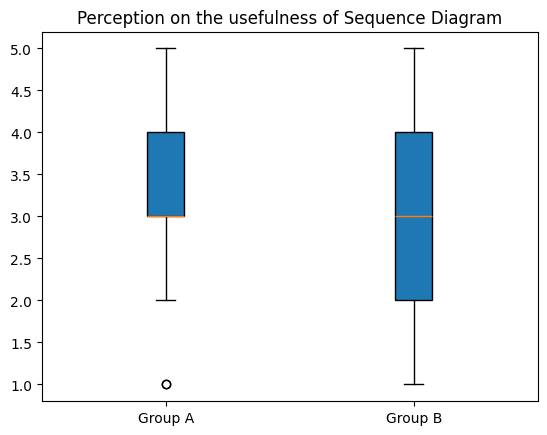

In [64]:
# Perception of Sequence Diagram in Group A and Group B

import matplotlib.pyplot as plt
import warnings
import numpy as np
from google.colab import files

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

seq_A = df_A_part2["Sequence diagram"]
seq_B = df_B_part2["Sequence diagram"]

print(seq_A.describe())
print(seq_B.describe())

box_plot_data=[seq_A, seq_B]

fig = plt.figure()
plt.boxplot(box_plot_data, patch_artist=True, labels=['Group A','Group B'])
plt.title('Perception on the usefulness of Sequence Diagram')

fig.savefig('CN sequence diagram perception.jpg', bbox_inches='tight', dpi=250)
# files.download('CN sequence diagram perception.jpg')
plt.show()

## **Test of Equivalence (TOST) between Group A and Group B**

In [65]:
from scipy.stats import mannwhitneyu
delta = 1
p_low = mannwhitneyu(seq_B, [x + delta for x in seq_A], alternative = "greater")
p_up = mannwhitneyu([x - delta for x in seq_A], seq_B, alternative = "greater")
p_TOST = max(p_low, p_up)

print(p_low)
print(p_up)
print(p_TOST)

MannwhitneyuResult(statistic=128.0, pvalue=0.9998800629405942)
MannwhitneyuResult(statistic=237.5, pvalue=0.9355912641877047)
MannwhitneyuResult(statistic=237.5, pvalue=0.9355912641877047)


## **Perception on the usefulness of Sequence Diagram and DFD in Group A**

0.005933053466503206
0     1.0
1     5.0
2     1.0
3     4.0
4     3.0
5     5.0
6     4.0
7     4.0
8     3.0
9     4.0
10    5.0
11    3.0
12    4.0
13    3.0
14    3.0
15    4.0
16    5.0
17    3.0
18    5.0
19    4.0
20    4.0
21    2.0
22    4.0
23    4.0
24    5.0
Name: DFD, dtype: float64
0     1
1     5
2     1
3     3
4     3
5     5
6     3
7     4
8     3
9     4
10    5
11    2
12    4
13    3
14    3
15    4
16    4
17    2
18    5
19    3
20    4
21    2
22    3
23    4
24    5
Name: Sequence diagram, dtype: int64


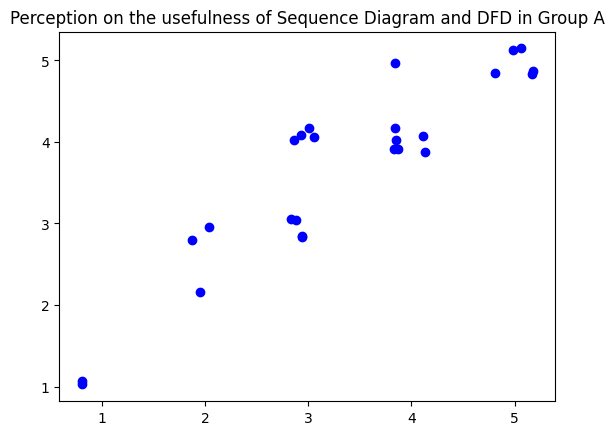

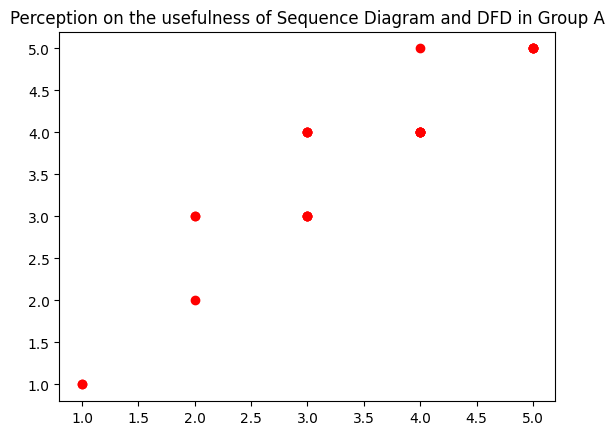

In [66]:
import matplotlib.pyplot as plt
import random

print(random.uniform(0, 0.01))

dfd_A = df_A_part2["DFD"]
print(dfd_A)
print(seq_A)

fig = plt.figure()
plt.scatter([x + random.uniform(-0.2, 0.2) for x in seq_A], [x + random.uniform(-0.2, 0.2) for x in dfd_A], c = "blue")
plt.title('Perception on the usefulness of Sequence Diagram and DFD in Group A')

fig.savefig('CN sequence diagram and DFD perception.jpg', bbox_inches='tight', dpi=250)
# files.download('CN sequence diagram and DFD perception.jpg')
plt.show()

plt.scatter(seq_A, dfd_A, c = "red")
plt.title('Perception on the usefulness of Sequence Diagram and DFD in Group A')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

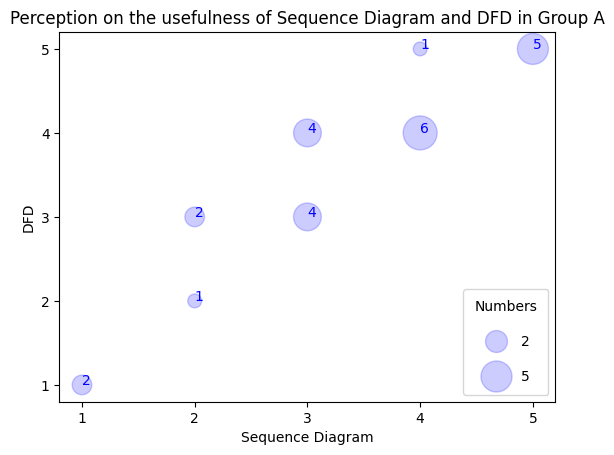

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

scatterplot_data = np.zeros((5, 5), dtype=int)
[rows, cols] = scatterplot_data.shape

for x, y in zip(seq_A, dfd_A):
  scatterplot_data[(int)(x-1)][(int)(y-1)] += 1

x = []
y = []
area = []
count = []

for i in range(rows):
  for j in range(cols):
    if (scatterplot_data[i, j]):
      x.append(i+1)
      y.append(j+1)
      count.append(scatterplot_data[i, j])
      area.append(scatterplot_data[i, j]*100)

# print(x)
# print(y)
# print(count)
# print(area)

# print(scatterplot_data)

fig = plt.figure()

scatter = plt.scatter(x, y, s=area, c="blue", alpha=0.2)

for i, txt in enumerate(count):
  plt.annotate(txt, (x[i], y[i]), color='blue')

kw = dict(prop="sizes", num=2, color="blue", alpha=0.2, fmt="{x:.0f}", func=lambda s: s/100)
plt.legend(*scatter.legend_elements(**kw), loc="lower right", title="Numbers", labelspacing=1.5, borderpad=0.8)

# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.2, color="blue")
# plt.legend(handles, labels, loc="lower right", title="Numbers", labelspacing=1.5)

x = MultipleLocator(1)
y = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
ax.yaxis.set_major_locator(y)

plt.title('Perception on the usefulness of Sequence Diagram and DFD in Group A')
plt.xlabel('Sequence Diagram')
plt.ylabel('DFD')

fig.savefig('CN sequence diagram and DFD perception.jpg', bbox_inches='tight', dpi=250)
files.download('CN sequence diagram and DFD perception.jpg')

plt.show()

<ipython-input-68-e39640eee1df>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, patch_artist=True, labels=['Sequence Diagram','DFD'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

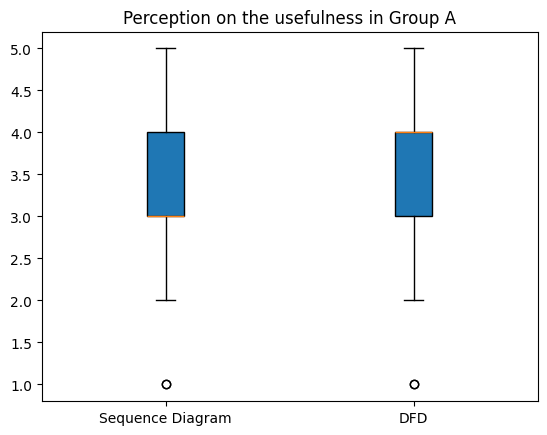

In [68]:
# Perception of Sequence Diagram and DFD in Group A

import matplotlib.pyplot as plt
import warnings
import numpy as np
from google.colab import files

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

box_plot_data=[seq_A, dfd_A]

fig = plt.figure()
plt.boxplot(box_plot_data, patch_artist=True, labels=['Sequence Diagram','DFD'])
plt.title('Perception on the usefulness in Group A')

fig.savefig('CN sequence diagram and DFD perception-boxplot.jpg', bbox_inches='tight', dpi=250)
files.download('CN sequence diagram and DFD perception-boxplot.jpg')
plt.show()

## **Compare Seq and DFD**

In [69]:
# from scipy.stats import mannwhitneyu
# from scipy.stats import wilcoxon

# p_mwu = mannwhitneyu(seq_A, dfd_A, alternative = "greater")

# print(p_mwu)
# print(seq_A.describe())
# print(dfd_A.describe())

import scipy.stats as stats
stats.ttest_rel(seq_A, dfd_A)
# stats.wilcoxon(seq_A, dfd_A)


TtestResult(statistic=-3.055050463303893, pvalue=0.005442890013378664, df=24)

## Saved MWU

In [70]:
import scipy.stats as sp
sp.stats.ttest_ind(df_A_part2.dropna()['Sequence diagram'], df_A_part2.dropna()['DFD'], equal_var =False)

<ipython-input-70-557b057c69eb>:2: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  sp.stats.ttest_ind(df_A_part2.dropna()['Sequence diagram'], df_A_part2.dropna()['DFD'], equal_var =False)


TtestResult(statistic=-0.8478363084157058, pvalue=0.4007435773916407, df=47.92665500755057)

In [71]:
import scipy.stats as sp
sp.stats.ttest_ind(df_A_part2.dropna()['Sequence diagram'], df_B_part2.dropna()['Sequence diagram'], equal_var =False)

# compare sequence B with

<ipython-input-71-e579382e416a>:2: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  sp.stats.ttest_ind(df_A_part2.dropna()['Sequence diagram'], df_B_part2.dropna()['Sequence diagram'], equal_var =False)


TtestResult(statistic=1.2247448713915887, pvalue=0.22667125344052896, df=47.81322957198444)

In [72]:
from scipy.stats import mannwhitneyu

# compare the mean value of the sequence diagram in the two groups
seq_mean_A = 3.4
seq_mean_B = 3.0

# assumming that sq of group B (s2-without dfd) should be greater that in group a (s1)
mwt = mannwhitneyu(seq_mean_B, seq_mean_A, alternative='greater')
mwt

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

In [73]:
from scipy import stats
from scipy.stats import ranksums
seqd_A = [1, 5, 1, 3, 3, 5, 3, 4, 3, 4, 5, 2, 4, 3, 3, 4, 4, 2, 5, 3, 4, 2, 3, 4, 5]
dfd_A  = [1, 5, 1, 4, 3, 5, 4, 4, 3, 4, 5, 3, 4, 3, 3, 4, 5, 3, 5, 4, 4, 2, 4, 4, 5]

ranksums(seqd_A, dfd_A)

RanksumsResult(statistic=-0.9119339501366119, pvalue=0.361803488317166)

In [74]:
from scipy.stats import mannwhitneyu

# assumming that sq of group B (without dfd) should be greater that in group a

seqd_A = [1, 5, 1, 3, 3, 5, 3, 4, 3, 4, 5, 2, 4, 3, 3, 4, 4, 2, 5, 3, 4, 2, 3, 4, 5]
seqd_B = [3, 2, 4, 5, 2, 2, 2, 4, 2, 3, 3, 1, 5, 4, 2, 3, 3, 2, 3, 4, 3, 4, 2, 2, 5]

mwt = mannwhitneyu(seqd_B, seqd_A, alternative='greater')
mwt

MannwhitneyuResult(statistic=245.5, pvalue=0.9114643936094802)

In [75]:
# TOST
# H2.1: PU seq (A) = PU seq (B); so we establish that two groups are indestinguishable in their appreciation of graphical models
# ordinal data (no need for log)
from scipy.stats import mannwhitneyu

seqd_A = [1, 5, 1, 3, 3, 5, 3, 4, 3, 4, 5, 2, 4, 3, 3, 4, 4, 2, 5, 3, 4, 2, 3, 4, 5]
seqd_B = [3, 2, 4, 5, 2, 2, 2, 4, 2, 3, 3, 1, 5, 4, 2, 3, 3, 2, 3, 4, 3, 4, 2, 2, 5]

delta = 1

print ("Group A is lower than Group B - delta")
H2_1_1_0 = mannwhitneyu(seqd_A, [x - delta for x in seqd_B], alternative="less")
print(H2_1_1_0)
# no

print("ALTERNATIVE 1: Group A is not lower then Group B - delta")
H2_1_1_a = mannwhitneyu(seqd_A, [x - delta for x in seqd_B], alternative="greater")
print(H2_1_1_a)
# no

print("Group A is greater than Group B + delta")
H2_1_2_0 = mannwhitneyu(seqd_A, [x + delta for x in seqd_B], alternative="greater")
print(H2_1_2_0)
# no

print("ALTERNATIVE 2: Group A is not greater then Group B + delta")
H2_1_2_a = mannwhitneyu(seqd_A, [x + delta for x in seqd_B], alternative="less")
print(H2_1_2_a)
# yes
# outcome: if delta = 0.7 can not claim equivalence, as we would need p<0.05 also for ALTERNATIVE 1 (for the lower bound).
# if delta = 1 equivallent



Group A is lower than Group B - delta
MannwhitneyuResult(statistic=497.0, pvalue=0.9998800629405942)
ALTERNATIVE 1: Group A is not lower then Group B - delta
MannwhitneyuResult(statistic=497.0, pvalue=0.0001296061472233755)
Group A is greater than Group B + delta
MannwhitneyuResult(statistic=237.5, pvalue=0.9355912641877047)
ALTERNATIVE 2: Group A is not greater then Group B + delta
MannwhitneyuResult(statistic=237.5, pvalue=0.0669802394560127)


In [76]:
# TOST
# H2.2: PU DFD (A) > PU SEQ (A); difference not supported, in Table VII. What about equivallence?
from scipy.stats import mannwhitneyu

seqd_A = [1, 5, 1, 3, 3, 5, 3, 4, 3, 4, 5, 2, 4, 3, 3, 4, 4, 2, 5, 3, 4, 2, 3, 4, 5]
dfd_A  = [1, 5, 1, 4, 3, 5, 4, 4, 3, 4, 5, 3, 4, 3, 3, 4, 5, 3, 5, 4, 4, 2, 4, 4, 5]

delta = 1

print ("PU (DFD) A is lower than PU (SEQ) A - delta")
H2_1_1_0 = mannwhitneyu(dfd_A, [x - delta for x in seqd_A], alternative="less")
print(H2_1_1_0)


print("ALTERNATIVE 1: PU (DFD) A is not lower then PU (SEQ) A - delta")
H2_1_1_a = mannwhitneyu(dfd_A, [x - delta for x in seqd_A], alternative="greater")
print(H2_1_1_a)


print("PU (DFD) A is greater than PU (SEQ) A + delta")
H2_1_2_0 = mannwhitneyu(dfd_A, [x + delta for x in seqd_A], alternative="greater")
print(H2_1_2_0)


print("ALTERNATIVE 2: PU (DFD) A is not greater then PU (SEQ) A + delta")
H2_1_2_a = mannwhitneyu(dfd_A, [x + delta for x in seqd_A], alternative="less")
print(H2_1_2_a)


PU (DFD) A is lower than PU (SEQ) A - delta
MannwhitneyuResult(statistic=490.0, pvalue=0.9998064325113221)
ALTERNATIVE 1: PU (DFD) A is not lower then PU (SEQ) A - delta
MannwhitneyuResult(statistic=490.0, pvalue=0.00020875150110903542)
PU (DFD) A is greater than PU (SEQ) A + delta
MannwhitneyuResult(statistic=211.0, pvalue=0.9799780208798727)
ALTERNATIVE 2: PU (DFD) A is not greater then PU (SEQ) A + delta
MannwhitneyuResult(statistic=211.0, pvalue=0.021017936328602937)


# Spearman's Correlation Group A

In [77]:
#create new column with list of TP and TN
df_perf_TP_A = df_A.assign(TPA = [5, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 3, 4, 5, 4, 3, 5, 5, 5, 4, 4])
df_perf_TN_A = df_A.assign(TNA = [5, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 0, 0, 0, 1, 1])
print(df_perf_TP_A)
print(df_perf_TN_A)



      Group Student_ID  Duration  Threat_1  Threat_2  Threat_3  Threat_4  \
0   Group A   19074516      1189         1         2         1         1   
1   Group A   19041220       535         1         1         1         1   
2   Group A   19074406       566         1         1         1         1   
3   Group A   19074305       774         1         1         2         1   
4   Group A   19074502       977         1         1         2         1   
5   Group A   19074518      1292         1         2         1         1   
6   Group A   19074211       372         1         1         1         1   
7   Group A   19074221       805         1         1         1         2   
8   Group A   19074309       877         1         1         2         1   
9   Group A   19074105      1051         1         1         2         2   
10  Group A   19090326      1180         1         2         1         1   
11  Group A   DT200702      1684         1         2         1         1   
12  Group A 

In [78]:
df['组别'].describe()

,组别
count,50
unique,2
top,Group A
freq,25


In [79]:
#perception questions grouped in groups A and B
corr_A = df[df['组别'].str.contains("Group A")==True]
corr_B = df[df['组别'].str.contains("Group B")==True]
corr_A

,组别,2、学号,所用时间（秒）,8,9,10,11,12,14,15,...,19、参考信息中的：威胁类别,19. Reference information: the object of the threat,20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur,21. Your knowledge of threat analysis is enough for you to understand threat descriptions,22. Please evaluate the difficulty of judging whether the threat is likely to occur,"23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?",24. You have enough time to read the materials and complete the tasks,"25. The information provided in the questionnaire (reading materials, threat lists) is enough for you to judge whether the threat is likely to occur",26、你认为还有哪些信息（如文档、材料等）会有帮助，但在问卷中却没有？,27、关于判断威胁是否有可能发生的任务，欢迎写下你的意见建议：
0,Group A,19074516,1189,1,2,1,1,2,2,2,...,3,3,2,2,2,3,2,2,我认为1.对威胁类别的解释可以再详细一些，比如威胁的关键条件 2.数据流图画的太复杂了没时间...,背景知识可以在细致一些
1,Group A,19041220,535,1,1,1,1,2,2,2,...,5,5,3,4,3,3,2,2,(空),(空)
2,Group A,19074406,566,1,1,1,1,2,2,2,...,2,2,3,4,2,4,3,4,(空),(空)
3,Group A,19074305,774,1,1,2,1,2,2,2,...,5,5,4,3,3,3,3,4,(空),(空)
4,Group A,19074502,977,1,1,2,1,2,2,2,...,2,2,3,3,4,3,4,4,希望可以加入某种攻击手段的举例，例如中间人攻击或dos攻击等手段，能够更快的理解，大段的文字...,(空)
5,Group A,19074518,1292,1,2,1,1,1,2,2,...,3,3,2,2,3,2,3,3,(空),(空)
6,Group A,19074211,372,1,1,1,1,1,2,2,...,3,3,2,2,3,3,3,3,(空),(空)
7,Group A,19074221,805,1,1,1,2,2,2,2,...,5,5,2,3,3,3,4,3,(空),(空)
8,Group A,19074309,877,1,1,2,1,2,2,1,...,5,5,4,4,3,3,4,4,(空),(空)
9,Group A,19074105,1051,1,1,2,2,2,2,2,...,2,2,2,3,4,3,4,3,(空),(空)


In [80]:
# Set-up Python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns
sns.set_theme()
from scipy.stats import spearmanr

In [81]:
#Farmiliarity with GitHub vs Actual performance (TP) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur'], df_perf_TP_A['TPA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.26988636363636365
0.1919900264477682


In [82]:
#Farmiliarity with GitHub vs Actual performance (TN) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur'], df_perf_TN_A['TNA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.03063563240948931
0.8844189643818834


In [83]:
#Farmiliarity with STRIDE CATEGORIES vs Actual performance (TP) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['21. Your knowledge of threat analysis is enough for you to understand threat descriptions'], df_perf_TP_A['TPA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.008926742262102123
0.9662202250916602


In [84]:
#Farmiliarity with STRIDE CATEGORIES vs Actual performance (TN) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['21. Your knowledge of threat analysis is enough for you to understand threat descriptions'], df_perf_TN_A['TNA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.26382041599334427
0.20256114359977603


In [85]:
#Perceived difficulty vs Actual performance (TP) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['22. Please evaluate the difficulty of judging whether the threat is likely to occur'], df_perf_TP_A['TPA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.09406862241951736
0.6546892599811983


In [86]:
#Perceived difficulty vs Actual performance (TN) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['22. Please evaluate the difficulty of judging whether the threat is likely to occur'], df_perf_TN_A['TNA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.2953287589653072
0.15178804928481124


In [87]:
#Perceived confidence vs Actual performance (TP) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?'], df_perf_TP_A['TPA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.04884996059035968
0.8166287121107102


In [88]:
#Perceived confidence vs Actual performance (TN) Group A
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_A['23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?'], df_perf_TN_A['TNA'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.4111994783932849
0.04114384730327506


# Spearman's Correlation Group B

In [89]:
#create new column with list of TP and TN
df_perf_TP_B = df_B.assign(TPB = [5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 3, 5, 5, 3, 4, 5, 5, 5, 5, 4, 2, 3, 3])
df_perf_TN_B = df_B.assign(TNB = [4, 4, 4, 5, 3, 3, 3, 3, 4, 4, 3, 4, 4, 2, 2, 4, 3, 2, 1, 1, 0, 1, 2, 1, 0])
print(df_perf_TP_B)
print(df_perf_TN_B)



      Group Student_ID  Duration  Threat_1  Threat_2  Threat_3  Threat_4  \
25  Group B   19074519       942         1         1         1         1   
26  Group B   DT200701      1085         1         1         1         1   
27  Group B   19074216      1626         1         1         1         1   
28  Group B   19074213      1673         1         2         2         1   
29  Group B   19074208       425         1         2         1         1   
30  Group B   19074315       483         1         1         1         1   
31  Group B   18074705      1305         1         1         1         1   
32  Group B   19074505      1480         1         1         1         1   
33  Group B   19074115      1673         1         1         1         2   
34  Group B   19074304      1660         2         1         1         1   
35  Group B   19074201      1705         1         2         1         1   
36  Group B   19074510       767         1         2         2         1   
37  Group B 

In [90]:
#Farmiliarity with GitHub vs Actual performance (TP) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur'], df_perf_TP_B['TPB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.23300751242893503
0.2623272662205014


In [91]:
#Farmiliarity with GitHub vs Actual performance (TN) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['20. Your existing knowledge of Git and GitHub is sufficient for you to determine whether a threat is likely to occur'], df_perf_TN_B['TNB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.30983913626274917
0.13174473352685653


In [98]:
#Farmiliarity with STRIDE CATEGORIES vs Actual performance (TP) Group b
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['21. Your knowledge of threat analysis is enough for you to understand threat descriptions'], df_perf_TP_B['TPB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.018701646060075943
0.9292977432818916


,21. Your knowledge of threat analysis is enough for you to understand threat descriptions
25,4
26,4
27,4
28,3
29,4
30,2
31,3
32,2
33,1
34,3


In [93]:
#Farmiliarity with STRIDE CATEGORIES vs Actual performance (TN) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['21. Your knowledge of threat analysis is enough for you to understand threat descriptions'], df_perf_TN_B['TNB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.03068635552280632
0.8842288557531695


In [94]:
#Perceived difficulty vs Actual performance (TP) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['22. Please evaluate the difficulty of judging whether the threat is likely to occur'], df_perf_TP_B['TPB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.015566651206392553
0.9411275880105572


In [95]:
#Perceived difficulty vs Actual performance (TN) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['22. Please evaluate the difficulty of judging whether the threat is likely to occur'], df_perf_TN_B['TNB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.303090631955395
0.14081366210275803


In [96]:
#Perceived confidence vs Actual performance (TP) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?'], df_perf_TP_B['TPB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.1978460583736135
0.34312856154936433


In [97]:
#Perceived confidence vs Actual performance (TN) Group B
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(corr_B['23. In the task of judging whether a threat is likely to occur, how correct do you think your answer is?'], df_perf_TN_B['TNB'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.03890368947672794
0.8535197980431763
